In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib


In [2]:
pd.set_option("display.max_columns", None)

# show all rows
pd.set_option("display.max_rows", None)

# optionally expand width
pd.set_option("display.width", 1000)

#### Data consists of 21 keypoints, each with x, y and z

In [3]:
data = pd.read_csv("Dataset/hand_landmarks_data.csv")
data.head()

,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,y4,z4,x5,y5,z5,x6,y6,z6,x7,y7,z7,x8,y8,z8,x9,y9,z9,x10,y10,z10,x11,y11,z11,x12,y12,z12,x13,y13,z13,x14,y14,z14,x15,y15,z15,x16,y16,z16,x17,y17,z17,x18,y18,z18,x19,y19,z19,x20,y20,z20,x21,y21,z21,label
0,262.669968,257.304901,-3.649205e-07,257.417542,247.109055,0.004224,246.882957,241.716827,0.005798,236.384537,241.453918,0.005872,230.076668,243.947525,0.005236,238.130150,233.234192,0.000154,225.652794,247.249207,-0.003813,226.056931,255.866364,-0.006753,228.159897,260.384155,-0.007799,236.882492,238.052338,-0.004955,226.113327,252.712662,-0.010097,229.431679,260.451080,-0.014108,232.641357,265.248962,-0.016854,236.293053,244.317657,-0.009528,225.111259,256.214203,-0.016194,227.390144,263.649139,-0.020701,230.754410,268.069519,-0.023142,236.512527,251.706177,-0.013198,223.345093,255.490692,-0.020450,215.043365,258.114746,-0.024577,208.006393,259.608673,-0.026722,call
1,83.351778,346.059113,-2.345265e-07,81.925037,328.562347,-0.011102,90.080132,311.535248,-0.021096,95.641823,298.860626,-0.029252,94.470360,287.298767,-0.034743,108.349709,308.093719,-0.022332,126.623394,317.461853,-0.033495,120.436695,321.913879,-0.039811,113.516293,320.967957,-0.044990,112.661499,318.378937,-0.024038,126.470741,326.580048,-0.032438,119.046581,329.816071,-0.033811,114.183495,329.230194,-0.036610,115.033024,330.221741,-0.026222,129.401276,335.143341,-0.034942,123.797516,337.128418,-0.030081,118.561386,336.647949,-0.027561,116.245079,341.947784,-0.029042,132.451618,341.794434,-0.038175,142.773582,342.829254,-0.037336,152.431698,343.015991,-0.036136,call
2,187.756977,260.235492,-2.417307e-07,195.460579,241.506035,-0.000184,207.259529,223.674339,-0.009687,215.413628,209.035360,-0.020580,214.772873,196.609588,-0.029497,227.154053,225.576852,-0.016897,245.390419,237.862886,-0.023851,239.404152,244.408742,-0.024241,232.023811,244.865198,-0.024215,229.581985,237.329024,-0.025533,245.673843,248.809410,-0.029864,238.769005,254.638094,-0.027649,231.852882,253.995576,-0.027500,230.325073,251.093664,-0.033584,246.591980,260.490353,-0.038898,240.098305,265.280085,-0.033344,233.025467,264.505473,-0.030234,230.100174,265.584175,-0.041256,250.301010,268.602938,-0.044068,262.425133,271.276638,-0.040469,272.989952,272.272231,-0.038301,call
3,114.976696,331.594238,-1.233261e-07,114.503494,320.549957,-0.002824,116.636627,310.080994,-0.008911,117.685066,301.874115,-0.015029,116.766609,294.977814,-0.019514,129.777031,308.501129,-0.010413,139.635818,310.151733,-0.016497,136.397449,312.745758,-0.020082,131.874081,313.205322,-0.023151,132.963112,315.039551,-0.014133,141.762932,315.943848,-0.018309,138.536854,317.723969,-0.019228,134.968494,319.064636,-0.021387,134.844761,322.039795,-0.017837,143.293087,322.025909,-0.021707,140.613567,323.325195,-0.018406,137.043560,324.407806,-0.017291,135.485836,329.050110,-0.021804,145.195450,329.357544,-0.027622,151.053200,329.712341,-0.027863,155.990364,329.548828,-0.027723,call
4,188.795288,141.727867,-1.622995e-07,188.520905,127.947464,-0.002884,191.982880,111.010563,-0.008115,192.552521,98.687691,-0.013397,188.239563,90.394289,-0.017483,202.827484,110.826588,-0.013008,219.390350,112.392162,-0.019843,215.733658,117.425114,-0.022405,210.229782,118.631218,-0.024263,206.339752,118.629364,-0.016029,221.155609,120.211258,-0.021682,217.215561,124.373337,-0.022350,212.064911,125.186268,-0.023731,209.829666,126.978264,-0.018826,223.595139,127.696289,-0.023907,219.652115,130.917194,-0.020978,214.071228,131.502628,-0.019323,213.105820,135.293209,-0.021623,226.696396,132.263248,-0.025113,234.831741,130.684147,-0.024087,241.587769,128.477188,-0.023486,call


#### The data Contains no NULLs at all, so no imputation will be needed

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25675 entries, 0 to 25674
Data columns (total 64 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      25675 non-null  float64
 1   y1      25675 non-null  float64
 2   z1      25675 non-null  float64
 3   x2      25675 non-null  float64
 4   y2      25675 non-null  float64
 5   z2      25675 non-null  float64
 6   x3      25675 non-null  float64
 7   y3      25675 non-null  float64
 8   z3      25675 non-null  float64
 9   x4      25675 non-null  float64
 10  y4      25675 non-null  float64
 11  z4      25675 non-null  float64
 12  x5      25675 non-null  float64
 13  y5      25675 non-null  float64
 14  z5      25675 non-null  float64
 15  x6      25675 non-null  float64
 16  y6      25675 non-null  float64
 17  z6      25675 non-null  float64
 18  x7      25675 non-null  float64
 19  y7      25675 non-null  float64
 20  z7      25675 non-null  float64
 21  x8      25675 non-null  float64
 22

#### X and Y are not normalized and have a larger range compared to Z

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
x1,25675.0,2.019586e+02,9.050033e+01,-36.050926,1.241103e+02,1.996678e+02,2.664285e+02,633.556020
y1,25675.0,2.601585e+02,7.653321e+01,45.722923,2.058159e+02,2.551818e+02,3.049917e+02,781.674469
z1,25675.0,1.272461e-07,2.737932e-07,-0.000002,-5.243216e-08,1.497277e-07,2.989988e-07,0.000002
x2,25675.0,2.025174e+02,8.477093e+01,7.184681,1.305359e+02,1.999795e+02,2.611475e+02,606.232386
y2,25675.0,2.521153e+02,7.538469e+01,51.256840,1.979996e+02,2.471139e+02,2.968508e+02,751.869416
z2,25675.0,-9.464835e-03,1.037558e-02,-0.096630,-1.519886e-02,-8.736699e-03,-2.782992e-03,0.076365
x3,25675.0,2.028630e+02,8.041209e+01,25.114323,1.367110e+02,2.000928e+02,2.558764e+02,598.541348
y3,25675.0,2.406460e+02,7.472192e+01,45.489950,1.870186e+02,2.357770e+02,2.849260e+02,719.365010
z3,25675.0,-1.594601e-02,1.397257e-02,-0.155846,-2.302031e-02,-1.423131e-02,-7.134500e-03,0.094131
x4,25675.0,2.030253e+02,7.964759e+01,23.446341,1.389058e+02,2.004820e+02,2.546228e+02,607.999801


### Before proceeding, i'll add a bunch of rows with all features set to 0, to account for `no_gesture` class

In [6]:
import pandas as pd
import numpy as np

# Generate column names
feature_cols = []
for i in range(1, 22):
    feature_cols += [f'x{i}', f'y{i}', f'z{i}']

# Create 1000x63 zero matrix
zeros = np.zeros((1000, 63))

# Create new dataframe
new_rows = pd.DataFrame(zeros, columns=feature_cols)

# Add label column
new_rows['label'] = 'no_gesture'

# Append to existing dataframe
data = pd.concat([data, new_rows], ignore_index=True)

#### checking the number of examples per class.

In [7]:
data["label"].value_counts()

label
three2             1653
palm               1649
four               1634
ok                 1592
stop_inverted      1567
call               1506
peace_inverted     1497
stop               1482
rock               1458
three              1456
peace              1441
like               1436
two_up_inverted    1371
two_up             1343
dislike            1295
one                1263
mute               1087
no_gesture         1000
fist                945
Name: count, dtype: int64

<Axes: xlabel='label'>

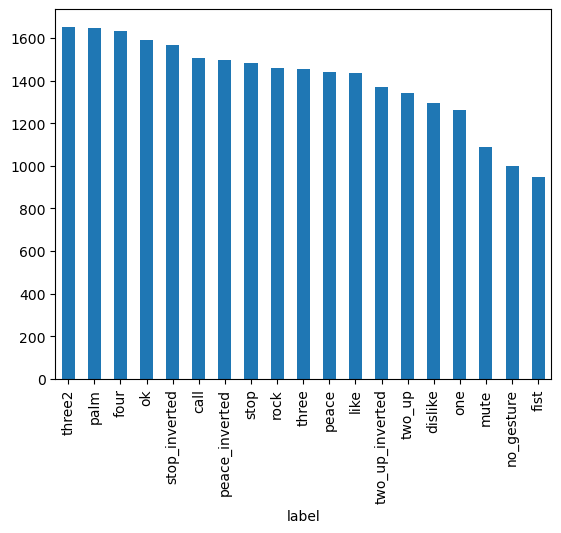

In [8]:
data["label"].value_counts().plot(kind='bar')

the dataset is somewhat unbalanced, `fist` has 945 examples whereas `three2` has 1653
so, when splitting the data, we need to ensure that both training and testing set have equal ratios of classes examples.
this ensures a more honest evaluation of model's metrics

As advised in Hand-on Machine Learning, it's better to create a testing set before doing any sort of preprocessing.
And since the classes aren't balanced, I chose to split the data using `StartifiedShuffleSplit` rather than the ordinary `train_test_split`.

In [9]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
X = data.drop(columns='label').copy()
y = data['label'].copy()

for train_idx, test_idx in splitter.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]



In [10]:
# verifying the shapes after splitting
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(26675, 63)
(21340, 63)
(5335, 63)


In [11]:
train_df = pd.concat([X_train, y_train], axis=1)
test_df  = pd.concat([X_test, y_test], axis=1)

#### Ensuing that everything is okay after the splitting and merging

label
three2             1322
palm               1319
four               1307
ok                 1274
stop_inverted      1254
call               1205
peace_inverted     1197
stop               1186
rock               1166
three              1165
peace              1153
like               1149
two_up_inverted    1097
two_up             1074
dislike            1036
one                1010
mute                870
no_gesture          800
fist                756
Name: count, dtype: int64


<Axes: xlabel='label'>

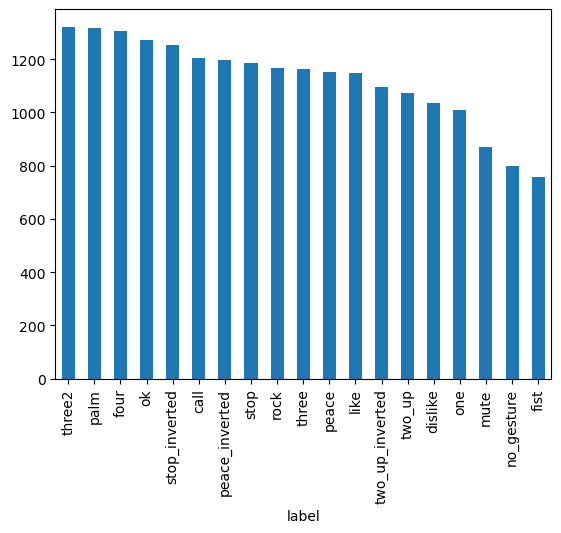

In [12]:
print(train_df['label'].value_counts())
train_df['label'].value_counts().plot(kind='bar')

label
three2             331
palm               330
four               327
ok                 318
stop_inverted      313
call               301
peace_inverted     300
stop               296
rock               292
three              291
peace              288
like               287
two_up_inverted    274
two_up             269
dislike            259
one                253
mute               217
no_gesture         200
fist               189
Name: count, dtype: int64


<Axes: xlabel='label'>

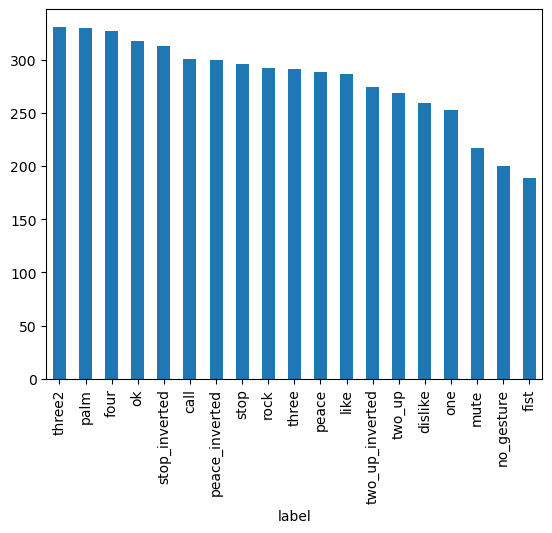

In [13]:
print(test_df['label'].value_counts())
test_df['label'].value_counts().plot(kind='bar')

In [14]:
train_df.head()

,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,y4,z4,x5,y5,z5,x6,y6,z6,x7,y7,z7,x8,y8,z8,x9,y9,z9,x10,y10,z10,x11,y11,z11,x12,y12,z12,x13,y13,z13,x14,y14,z14,x15,y15,z15,x16,y16,z16,x17,y17,z17,x18,y18,z18,x19,y19,z19,x20,y20,z20,x21,y21,z21,label
11952,291.361885,477.107860,3.227005e-07,273.351265,469.804893,-0.021741,257.849899,456.047944,-0.036077,246.435081,443.632026,-0.049093,235.893700,435.642641,-0.062305,273.751602,424.353852,-0.021202,267.355156,404.239164,-0.036978,264.824593,391.522406,-0.050984,263.516991,380.906840,-0.061666,287.070030,421.878151,-0.023913,288.648331,398.291078,-0.035655,290.027275,383.682438,-0.046590,291.208351,372.125438,-0.055141,299.228439,425.713203,-0.029807,303.908913,404.496306,-0.043099,306.297363,391.379636,-0.054572,307.823662,380.593407,-0.063232,310.431610,434.160652,-0.037818,320.619621,420.607164,-0.050216,326.988373,411.664671,-0.056911,332.051514,403.524298,-0.061729,palm
13245,216.409767,230.104340,5.597291e-07,194.632988,214.868256,-0.021721,186.681152,188.989807,-0.032282,200.398178,166.160767,-0.046017,215.466568,152.782150,-0.058087,187.069382,158.351089,-0.006688,173.170704,131.173004,-0.027933,164.850952,115.174530,-0.043322,159.045891,101.140091,-0.053312,205.983582,155.213181,-0.013832,210.369003,119.407768,-0.035716,212.999886,97.777512,-0.051611,217.684364,79.810760,-0.059657,222.633270,161.379776,-0.024930,226.368210,140.329361,-0.055952,219.151428,156.554306,-0.056960,216.601112,169.787567,-0.047378,237.577446,172.364563,-0.038356,238.231361,154.529755,-0.056533,230.082344,163.845276,-0.047126,226.173271,174.138290,-0.034544,peace
5577,203.223885,329.955505,-7.883936e-08,199.979530,312.652466,-0.003233,190.239338,298.260223,-0.007947,183.047310,287.880554,-0.012970,181.826855,277.631927,-0.018339,177.517754,308.037689,-0.010896,166.798336,310.792755,-0.019247,171.622971,312.719299,-0.026033,177.007919,312.859497,-0.030262,175.144833,319.175903,-0.013889,168.994263,322.200897,-0.018302,174.386478,322.353638,-0.020813,180.105492,321.857178,-0.024242,175.146870,329.467773,-0.016756,171.151394,330.640533,-0.020787,175.795750,330.237457,-0.017858,181.095657,329.637878,-0.016907,176.272419,338.076721,-0.019906,172.416744,338.227478,-0.021846,177.386147,337.806305,-0.016454,182.680939,337.656006,-0.012268,like
23327,100.901905,473.833011,4.863717e-07,116.932423,460.895190,-0.023654,122.444572,439.151060,-0.029471,112.377068,424.460788,-0.034790,101.590176,414.173771,-0.038564,114.828518,418.659498,-0.010094,115.272858,396.323237,-0.026351,114.440952,382.765911,-0.035459,112.953072,370.646232,-0.039938,102.258533,418.179521,-0.010764,102.095592,391.922724,-0.031188,103.058922,376.421013,-0.041105,103.490982,363.005322,-0.043244,90.196878,423.156245,-0.014952,91.243732,408.418592,-0.050116,97.474342,425.003507,-0.052004,100.132748,436.665326,-0.040984,78.679298,431.884295,-0.020416,82.452404,421.712886,-0.048491,88.997326,433.412411,-0.045543,91.119919,442.508081,-0.035305,two_up
5353,277.239693,330.853790,3.604870e-07,260.214661,322.436707,-0.015695,252.325333,303.473938,-0.022225,264.679848,290.028625,-0.028302,279.662109,288.683258,-0.034932,251.473228,281.829529,-0.012509,240.777763,263.453979,-0.023746,234.809372,251.013474,-0.034724,230.585312,240.823685,-0.044436,264.470512,277.178986,-0.016725,263.023270,253.333008,-0.025659,262.746162,237.636993,-0.036514,262.780243,225.710709,-0.044782,277.016487,279.436157,-0.023413,280.550720,256.754364,-0.037398,282.512306,241.607727,-0.053499,284.277695,229.295486,-0.064686,289.025276,286.488342,-0.031325,300.095810,271.697021,-0.047862,307.344635,261.260712,-0.058197,313.429939,252.673431,-0.065017,four


In [15]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21340 entries, 11952 to 22170
Data columns (total 64 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      21340 non-null  float64
 1   y1      21340 non-null  float64
 2   z1      21340 non-null  float64
 3   x2      21340 non-null  float64
 4   y2      21340 non-null  float64
 5   z2      21340 non-null  float64
 6   x3      21340 non-null  float64
 7   y3      21340 non-null  float64
 8   z3      21340 non-null  float64
 9   x4      21340 non-null  float64
 10  y4      21340 non-null  float64
 11  z4      21340 non-null  float64
 12  x5      21340 non-null  float64
 13  y5      21340 non-null  float64
 14  z5      21340 non-null  float64
 15  x6      21340 non-null  float64
 16  y6      21340 non-null  float64
 17  z6      21340 non-null  float64
 18  x7      21340 non-null  float64
 19  y7      21340 non-null  float64
 20  z7      21340 non-null  float64
 21  x8      21340 non-null  float64
 22 

In [16]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5335 entries, 4622 to 23913
Data columns (total 64 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      5335 non-null   float64
 1   y1      5335 non-null   float64
 2   z1      5335 non-null   float64
 3   x2      5335 non-null   float64
 4   y2      5335 non-null   float64
 5   z2      5335 non-null   float64
 6   x3      5335 non-null   float64
 7   y3      5335 non-null   float64
 8   z3      5335 non-null   float64
 9   x4      5335 non-null   float64
 10  y4      5335 non-null   float64
 11  z4      5335 non-null   float64
 12  x5      5335 non-null   float64
 13  y5      5335 non-null   float64
 14  z5      5335 non-null   float64
 15  x6      5335 non-null   float64
 16  y6      5335 non-null   float64
 17  z6      5335 non-null   float64
 18  x7      5335 non-null   float64
 19  y7      5335 non-null   float64
 20  z7      5335 non-null   float64
 21  x8      5335 non-null   float64
 22  y

## Now, to visualize some samples

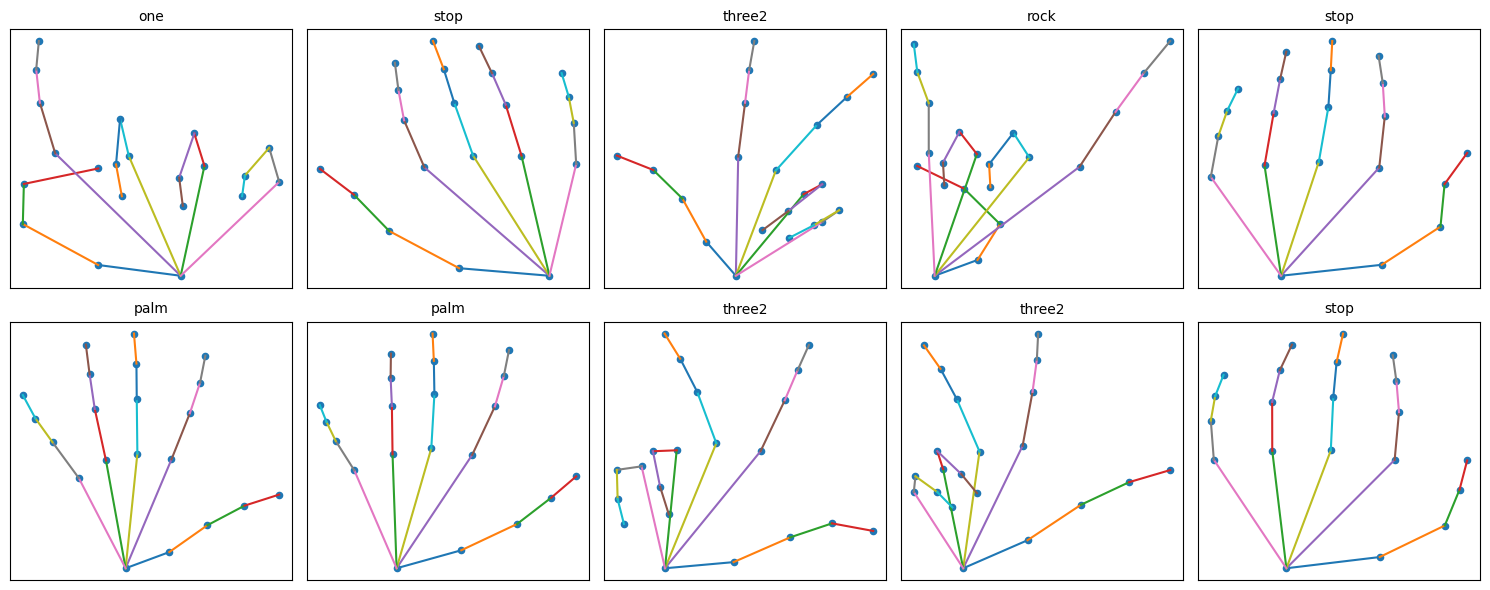

In [17]:
import numpy as np
import matplotlib.pyplot as plt

def visualize_grid_with_labels(samples, labels):
    """
    samples: shape (N, 63)
    labels: shape (N,)
    """

    connections = [
        (0,1),(1,2),(2,3),(3,4),
        (0,5),(5,6),(6,7),(7,8),
        (0,9),(9,10),(10,11),(11,12),
        (0,13),(13,14),(14,15),(15,16),
        (0,17),(17,18),(18,19),(19,20)
    ]

    samples = np.array(samples)
    labels = np.array(labels)

    fig, axes = plt.subplots(2, 5, figsize=(15,6))

    for ax, row, label in zip(axes.flatten(), samples, labels):
        landmarks = row.reshape(21,3)
        x = landmarks[:,0]
        y = landmarks[:,1]

        ax.scatter(x, y, s=20)

        for i,j in connections:
            ax.plot([x[i], x[j]], [y[i], y[j]])

        ax.invert_yaxis()
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(label, fontsize=10)

    plt.tight_layout()
    plt.show()


sample_df = data.sample(10)

X = sample_df.drop("label", axis=1).values
y = sample_df["label"].values

visualize_grid_with_labels(X, y)

In [18]:
## to compare between state before and after normalizatino
train_df.describe()

,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,y4,z4,x5,y5,z5,x6,y6,z6,x7,y7,z7,x8,y8,z8,x9,y9,z9,x10,y10,z10,x11,y11,z11,x12,y12,z12,x13,y13,z13,x14,y14,z14,x15,y15,z15,x16,y16,z16,x17,y17,z17,x18,y18,z18,x19,y19,z19,x20,y20,z20,x21,y21,z21
count,21340.000000,21340.000000,2.134000e+04,21340.000000,21340.000000,21340.000000,21340.000000,21340.000000,21340.000000,21340.000000,21340.000000,21340.000000,21340.000000,21340.000000,21340.000000,21340.000000,21340.000000,21340.000000,21340.000000,21340.000000,21340.000000,21340.000000,21340.000000,21340.000000,21340.000000,21340.000000,21340.000000,21340.000000,21340.000000,21340.000000,21340.000000,21340.000000,21340.000000,21340.000000,21340.000000,21340.000000,21340.000000,21340.000000,21340.000000,21340.000000,21340.000000,21340.000000,21340.000000,21340.000000,21340.000000,21340.000000,21340.000000,21340.000000,21340.000000,21340.000000,21340.000000,21340.000000,21340.000000,21340.000000,21340.000000,21340.000000,21340.000000,21340.000000,21340.000000,21340.000000,21340.000000,21340.000000,21340.000000
mean,194.441550,250.313388,1.221481e-07,195.010706,242.579310,-0.009113,195.374913,231.544125,-0.015348,195.565944,222.921816,-0.021913,195.546656,217.713939,-0.028044,195.234488,217.692487,-0.010600,195.546906,205.423014,-0.022457,195.531896,198.772612,-0.030387,195.451428,192.918710,-0.035146,194.826143,217.645180,-0.013778,195.054249,205.021890,-0.025686,195.034643,199.844454,-0.031760,194.995010,195.021308,-0.034371,194.526291,220.559886,-0.018119,194.714720,211.712047,-0.031251,194.759538,212.629684,-0.032724,194.781661,212.696969,-0.030825,194.226448,225.492733,-0.023204,194.307206,218.836652,-0.032452,194.320261,219.163097,-0.030971,194.373370,219.158620,-0.027723
std,96.579882,89.752401,2.686474e-07,91.476579,87.989686,0.010264,87.640163,86.301927,0.013916,87.013469,85.623123,0.017270,88.048729,85.578024,0.020743,88.567557,84.433849,0.011343,86.117677,84.095948,0.016517,85.282184,84.497220,0.020282,84.934893,85.173033,0.022757,91.713245,84.896402,0.012145,90.815823,85.093050,0.018540,90.711240,86.674595,0.021351,90.783659,88.454161,0.022506,95.301522,85.814869,0.013624,95.339902,86.069674,0.020714,94.732156,87.693982,0.021526,94.471354,89.527934,0.021623,99.185779,87.027831,0.015959,99.843519,87.096021,0.020903,99.501388,88.187668,0.021189,99.388849,89.512186,0.021261
min,-3.281868,0.000000,-1.759704e-06,0.000000,0.000000,-0.096630,0.000000,0.000000,-0.154987,0.000000,0.000000,-0.205323,0.000000,0.000000,-0.242476,0.000000,0.000000,-0.176002,0.000000,0.000000,-0.242614,0.000000,0.000000,-0.279875,0.000000,0.000000,-0.302675,0.000000,0.000000,-0.178811,0.000000,0.000000,-0.230100,0.000000,0.000000,-0.241587,0.000000,0.000000,-0.233758,0.000000,0.000000,-0.170851,0.000000,0.000000,-0.262415,0.000000,0.000000,-0.228054,0.000000,0.000000,-0.204022,0.000000,0.000000,-0.201897,0.000000,0.000000,-0.272537,0.000000,0.000000,-0.247631,-4.537216,0.000000,-0.210596
25%,118.965958,199.580027,-4.311812e-08,125.003677,192.162895,-0.014891,131.012990,180.717423,-0.022604,133.448075,171.769257,-0.030358,133.801500,165.932737,-0.037799,129.365129,166.883368,-0.015839,133.121638,153.569695,-0.030001,134.855727,145.784358,-0.039569,135.468275,138.480343,-0.045559,125.496303,166.625660,-0.019286,127.673198,152.280799,-0.034149,128.538932,145.274410,-0.041696,128.992641,138.736108,-0.044855,122.401019,169.327048,-0.024226,123.615206,158.822842,-0.040699,124.081134,158.890263,-0.043252,123.957393,157.930710,-0.041696,119.085812,173.757866,-0.030206,119.062915,166.247513,-0.042008,119.362507,165.943924,-0.041305,119.157663,164.940632,-0.038406
50%,190.747501,251.252869,1.379329e-07,192.889709,243.428806,-0.008277,194.517822,232.169366,-0.013689,194.885330,223.006403,-0.019460,194.975430,217.575851,-0.024799,193.768090,217.496758,-0.009135,194.853344,204.838753,-0.019903,194.594818,197.949487,-0.027116,194.622425,191.936731,-0.031450,192.622112,217.158875,-0.011915,193.690819,204.126472,-0.022441,193.859471,198.

In [19]:
xs = [f'x{i}' for i in range(1, 22)]
ys = [f'y{i}' for i in range(1, 22)]


def normalize(df):
    

    # subtract reference point (x1, y1)
    df[xs] = df[xs].sub(df['x1'], axis=0)
    df[ys] = df[ys].sub(df['y1'], axis=0)

    # compute scaling factor
    scaling_factor = np.sqrt(
        df['x13']**2 + df['y13']**2
    ) + 0.001

    # divide (broadcasted row-wise)
    df[xs] = df[xs].div(scaling_factor, axis=0)
    df[ys] = df[ys].div(scaling_factor, axis=0)


    return df

train_df = normalize(train_df)
test_df = normalize(test_df)

In [20]:
train_df.describe()

,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,y4,z4,x5,y5,z5,x6,y6,z6,x7,y7,z7,x8,y8,z8,x9,y9,z9,x10,y10,z10,x11,y11,z11,x12,y12,z12,x13,y13,z13,x14,y14,z14,x15,y15,z15,x16,y16,z16,x17,y17,z17,x18,y18,z18,x19,y19,z19,x20,y20,z20,x21,y21,z21
count,21340.0,21340.0,2.134000e+04,21340.000000,21340.000000,21340.000000,21340.000000,21340.000000,21340.000000,21340.000000,21340.000000,21340.000000,21340.000000,21340.000000,21340.000000,21340.000000,21340.000000,21340.000000,21340.000000,21340.000000,21340.000000,21340.000000,21340.000000,21340.000000,21340.000000,21340.000000,21340.000000,21340.000000,21340.000000,21340.000000,21340.000000,21340.000000,21340.000000,21340.000000,21340.000000,21340.000000,21340.000000,21340.000000,21340.000000,21340.000000,21340.000000,21340.000000,21340.000000,21340.000000,21340.000000,21340.000000,21340.000000,21340.000000,21340.000000,21340.000000,21340.000000,21340.000000,21340.000000,21340.000000,21340.000000,21340.000000,21340.000000,21340.000000,21340.000000,21340.000000,21340.000000,21340.000000,21340.000000
mean,0.0,0.0,1.221481e-07,0.014449,-0.134535,-0.009113,0.024993,-0.323716,-0.015348,0.029094,-0.476887,-0.021913,0.027875,-0.570934,-0.028044,0.027191,-0.568465,-0.010600,0.039029,-0.761152,-0.022457,0.037745,-0.859672,-0.030387,0.035075,-0.954414,-0.035146,0.018166,-0.563706,-0.013778,0.027785,-0.733082,-0.025686,0.024868,-0.748130,-0.031760,0.022563,-0.780343,-0.034371,0.010898,-0.513003,-0.018119,0.019026,-0.632864,-0.031251,0.017441,-0.580211,-0.032724,0.016132,-0.558950,-0.030825,0.003729,-0.432039,-0.023204,0.008584,-0.536247,-0.032452,0.007601,-0.521179,-0.030971,0.007342,-0.520293,-0.027723
std,0.0,0.0,2.686474e-07,0.238790,0.217368,0.010264,0.427314,0.427296,0.013916,0.501906,0.614733,0.017270,0.522442,0.771798,0.020743,0.581044,0.427876,0.011343,0.681633,0.585526,0.016517,0.605794,0.671464,0.020282,0.557002,0.755880,0.022757,0.538264,0.384991,0.012145,0.615986,0.474121,0.018540,0.514745,0.394114,0.021351,0.451992,0.385673,0.022506,0.504717,0.380169,0.013624,0.596245,0.458830,0.020714,0.491831,0.391540,0.021526,0.415783,0.386948,0.021623,0.497671,0.409716,0.015959,0.623107,0.521543,0.020903,0.622969,0.568701,0.021189,0.635654,0.633592,0.021261
min,0.0,0.0,-1.759704e-06,-5.831677,-1.392744,-0.096630,-13.674556,-2.760640,-0.154987,-17.480404,-3.882296,-0.205323,-17.976302,-5.044246,-0.242476,-35.792516,-2.885096,-0.176002,-24.607952,-4.467632,-0.242614,-11.544054,-5.446301,-0.279875,-3.635771,-6.226802,-0.302675,-34.902032,-7.976698,-0.178811,-20.660682,-7.662445,-0.230100,-9.021222,-4.002861,-0.241587,-0.999976,-0.999995,-0.233758,-29.933394,-17.913183,-0.170851,-21.526822,-19.463360,-0.262415,-11.265024,-14.611420,-0.228054,-3.974977,-9.872855,-0.204022,-23.729135,-25.844341,-0.201897,-28.490814,-34.639759,-0.272537,-30.720607,-40.170055,-0.247631,-32.381339,-44.035191,-0.210596
25%,0.0,0.0,-4.311812e-08,-0.153925,-0.204519,-0.014891,-0.257380,-0.503067,-0.022604,-0.269314,-0.772395,-0.030358,-0.230637,-0.958362,-0.037799,-0.182504,-0.612722,-0.015839,-0.236187,-0.734203,-0.030001,-0.267947,-0.860171,-0.039569,-0.285467,-0.965836,-0.045559,-0.078997,-0.536000,-0.019286,-0.114831,-0.750630,-0.034149,-0.139069,-0.884396,-0.041696,-0.161310,-0.996297,-0.044855,-0.103002,-0.507356,-0.024226,-0.142374,-0.711829,-0.040699,-0.131553,-0.833788,-0.043252,-0.123205,-0.925371,-0.041696,-0.203712,-0.462144,-0.030206,-0.245212,-0.607782,-0.042008,-0.239718,-0.695333,-0.041305,-0.227433,-0.769373,-0.038406
50%,0.0,0.0,1.379329e-07,0.061462,-0.118177,-0.008277,0.048938,-0.295479,-0.013689,0.015192,-0.430900,-0.019460,0.006253,-0.496969,-0.024799,0.027705,-0.485573,-0.009135,0.026133,-0.690930,-0.019903,0.020899,-0.821571,-0.027116,0.017515,-0.927925,-0.031450,0.000085,-0.494662,-0.011915,0.000000,-0.721223,-0.022441,0.000000,-0.868509,-0.028104,0.000099,-0.979410,-0.030500,0.000000,-0.455584,-0.015766,0.000000,-0.643797,-0.027805,0.000000,-0.715137,-0.029274,0.000000,-0.575476,-0.027129,0.000000,-0.388406,-0.020

## Normalization Done.

## Now to encoding the labels

In [21]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()

train_df[['label']] = encoder.fit_transform(train_df[['label']])
test_df[['label']] = encoder.transform(test_df[['label']])

In [22]:
train_df[['label']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 21340 entries, 11952 to 22170
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   label   21340 non-null  float64
dtypes: float64(1)
memory usage: 333.4 KB


In [23]:
test_df[['label']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 5335 entries, 4622 to 23913
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   label   5335 non-null   float64
dtypes: float64(1)
memory usage: 83.4 KB


### Now, the data is prepared to be passed to machine learning models.

In [24]:
X_train, X_test, y_train, y_test = train_df.drop(columns='label'), test_df.drop(columns='label'), train_df['label'], test_df['label']

## Importing the models

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from evaluation import evaluate_model

In [28]:
def plot_confusion_matrix(cm):
    if cm.max() > 1:
        cm = cm.astype(float) / cm.sum(axis=1, keepdims=True)

    plt.figure(figsize=(14, 12))
    sns.heatmap(
        cm,
        annot=True,
        fmt=".1%",
        cmap="Blues"
    )

    plt.title("Confusion Matrix (Row Normalized %)")
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.show()
    plt.close()

### KNN with 5 neighbors shows promising results

2026/02/28 23:24:27 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
/home/mahmoud-sayed/miniconda3/envs/mainenv/lib/python3.11/site-packages/mlflow/models/model.py:1209: FutureWarning: Saving scikit-learn models in the pickle or cloudpickle format requires exercising caution because these formats rely on Python's object serialization mechanism, which can execute arbitrary code during deserialization.The recommended safe alternative is the 'skops' format.
  flavor.save_model(path=local_path, mlflow_model=mlflow_model, **kwargs)


Accuracy 0.9775070290534208
Precision 0.9779184968800969
Recall 0.9777319727082381
f1-score 0.9777450357019649


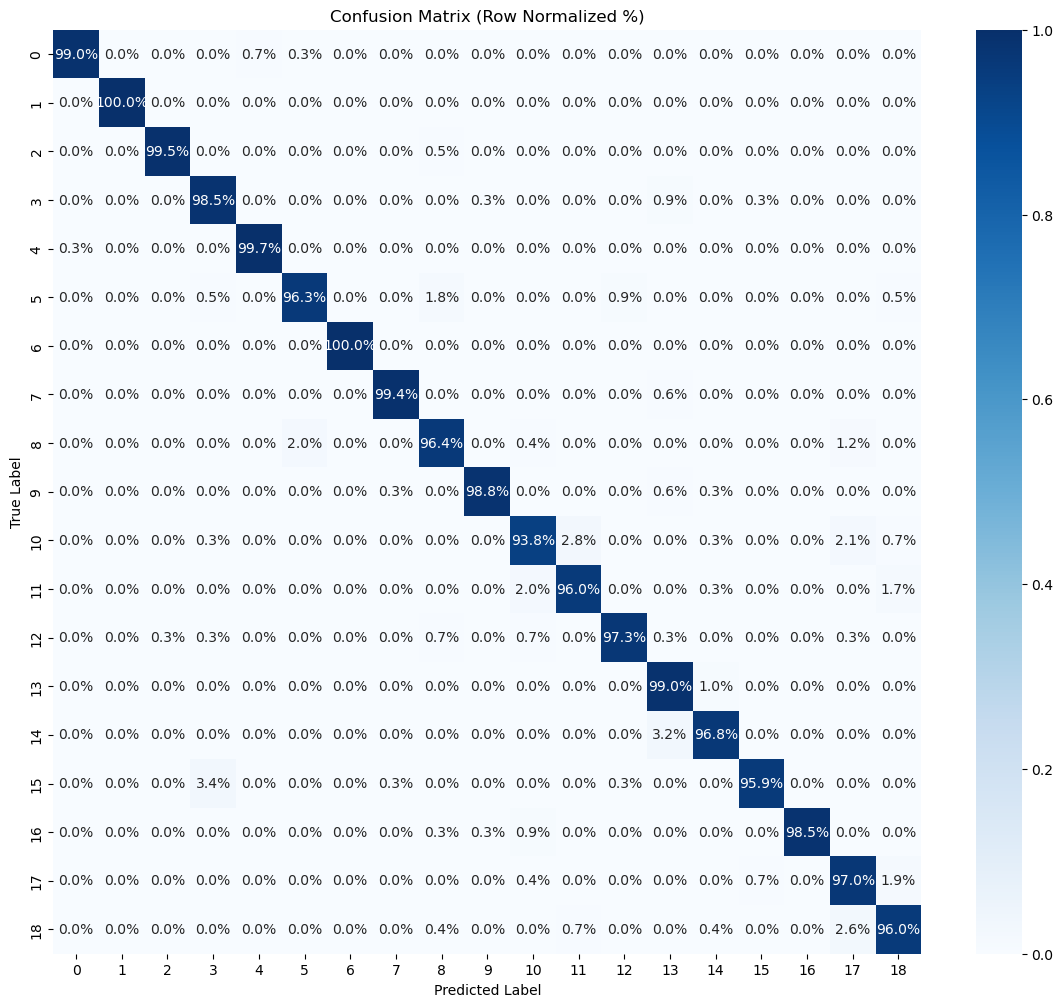

In [ ]:
KNN = KNeighborsClassifier(n_neighbors= 5)
KNN.fit(X_train, y_train)
metrics = evaluate_model(KNN, X_test, y_test)
print("Accuracy", metrics['Accuracy'])
print("Precision", metrics['Precision'])
print("Recall", metrics['Recall'])
print("f1-score", metrics['f1'])
plot_confusion_matrix(metrics['Confusion Matrix'])


In [ ]:
KNN = KNeighborsClassifier(n_neighbors= 3)
KNN.fit(X_train, y_train)
metrics = evaluate_model(KNN, X_test, y_test)

2026/02/28 23:24:30 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
/home/mahmoud-sayed/miniconda3/envs/mainenv/lib/python3.11/site-packages/mlflow/models/model.py:1209: FutureWarning: Saving scikit-learn models in the pickle or cloudpickle format requires exercising caution because these formats rely on Python's object serialization mechanism, which can execute arbitrary code during deserialization.The recommended safe alternative is the 'skops' format.
  flavor.save_model(path=local_path, mlflow_model=mlflow_model, **kwargs)


## Seems like changing the value of K won't highly effect the accuracy

Accuracy 0.9797563261480787
Precision 0.9801887263615768
Recall 0.9800140484602406
f1-score 0.9800290057233817


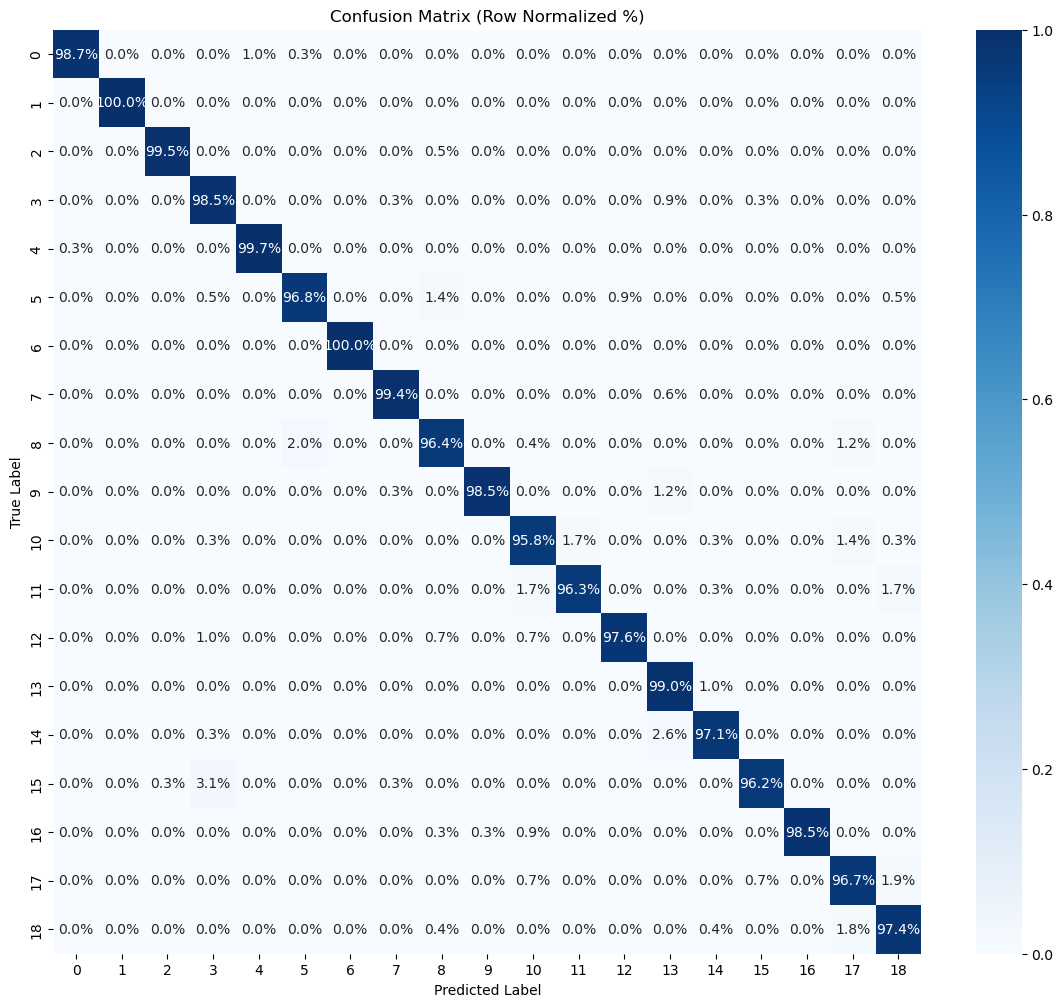

In [31]:
print("Accuracy", metrics['Accuracy'])
print("Precision", metrics['Precision'])
print("Recall", metrics['Recall'])
print("f1-score", metrics['f1'])
plot_confusion_matrix(metrics['Confusion Matrix'])

### Decision Tree seems Promising as well, Random Forest must perform better

#### `Note: ` I'm setting scoring = f1 because better in multi-class tasks

In [ ]:
param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 5, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
}

dt = DecisionTreeClassifier(random_state=42)

grid = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    cv=3,
    scoring="f1_macro",
    n_jobs=-1
)

grid.fit(X_train, y_train)

best_model = grid.best_estimator_

metrics = evaluate_model(best_model, X_test, y_test)
print("Accuracy", metrics['Accuracy'])
print("Precision", metrics['Precision'])
print("Recall", metrics['Recall'])
print("f1-score", metrics['f1'])
plot_confusion_matrix(metrics['Confusion Matrix'])


### Random forest performed better than Decision Tree as expected

Accuracy 0.9760074976569822
Precision 0.9766014261641363
Recall 0.9761944902482069
f1-score 0.9762749025637674


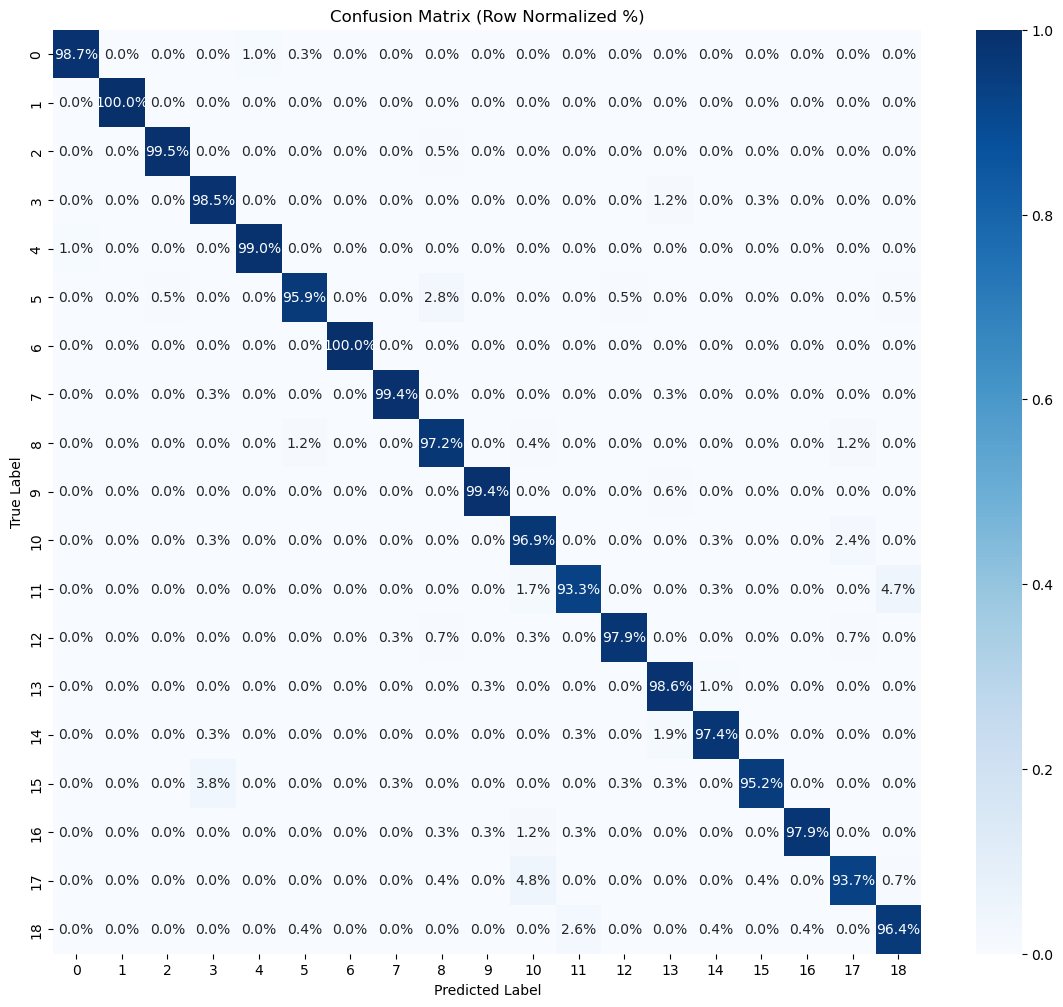

2026/02/28 23:02:28 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
/home/mahmoud-sayed/miniconda3/envs/mainenv/lib/python3.11/site-packages/mlflow/models/model.py:1209: FutureWarning: Saving scikit-learn models in the pickle or cloudpickle format requires exercising caution because these formats rely on Python's object serialization mechanism, which can execute arbitrary code during deserialization.The recommended safe alternative is the 'skops' format.
  flavor.save_model(path=local_path, mlflow_model=mlflow_model, **kwargs)


In [ ]:

param_grid = {
    "n_estimators": [100, 200, 250],
    "max_depth": [None, 5, 8],  
    "min_samples_split": [2, 5], 
    "min_samples_leaf": [1, 2],  
    "max_features": ["log2"],    
}


rfc = RandomForestClassifier(random_state=42,)

grid = GridSearchCV(
    estimator=rfc,
    param_grid=param_grid,
    cv=3,
    scoring="f1_macro",
    n_jobs=-1
)

grid.fit(X_train, y_train)

best_model = grid.best_estimator_

metrics = evaluate_model(best_model, X_test, y_test)
print("Accuracy", metrics['Accuracy'])
print("Precision", metrics['Precision'])
print("Recall", metrics['Recall'])
print("f1-score", metrics['f1'])
plot_confusion_matrix(metrics['Confusion Matrix'])


### SVC seems to perform the best among all models, in terms of all metrics, so it will be the model used for deployment

Accuracy 0.985941893158388
Precision 0.9861519729967853
Recall 0.986011955938308
f1-score 0.9860208968197073


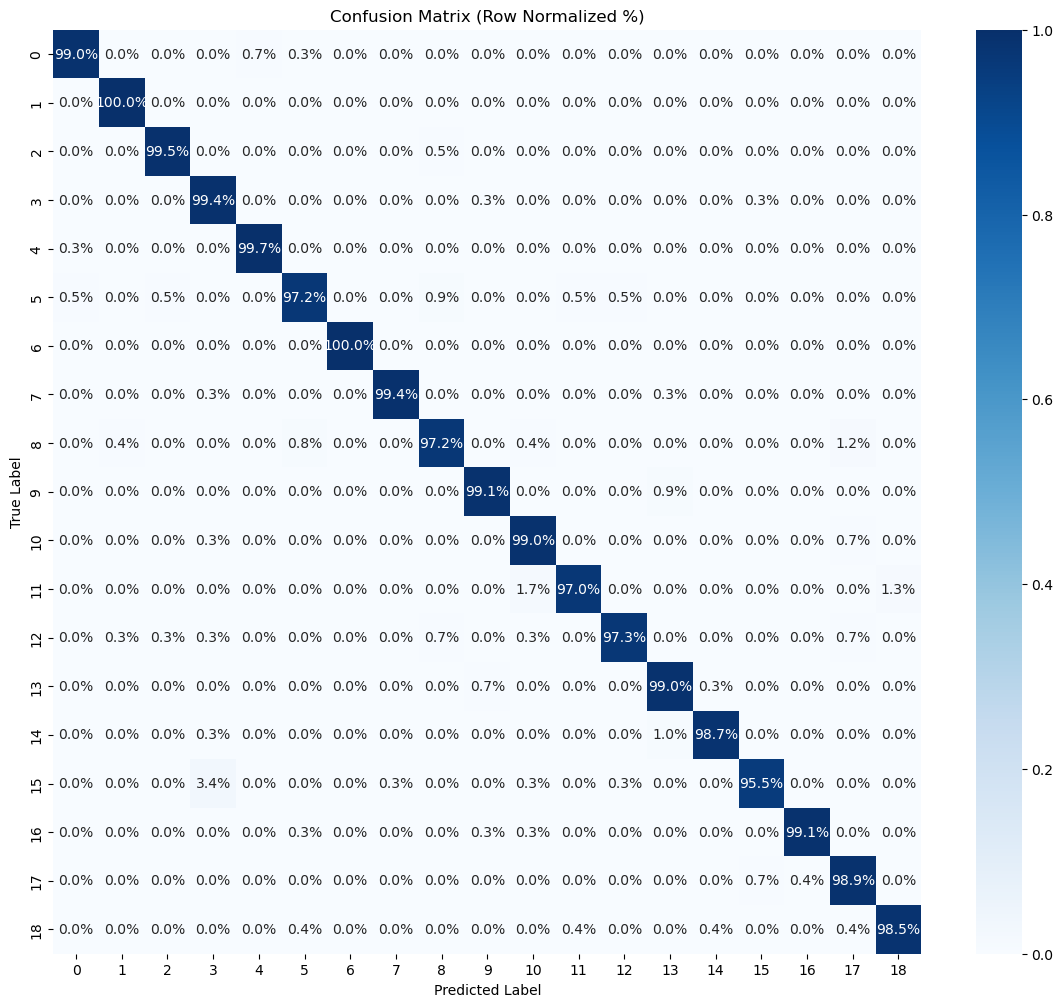

2026/02/28 23:03:48 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
/home/mahmoud-sayed/miniconda3/envs/mainenv/lib/python3.11/site-packages/mlflow/models/model.py:1209: FutureWarning: Saving scikit-learn models in the pickle or cloudpickle format requires exercising caution because these formats rely on Python's object serialization mechanism, which can execute arbitrary code during deserialization.The recommended safe alternative is the 'skops' format.
  flavor.save_model(path=local_path, mlflow_model=mlflow_model, **kwargs)


In [ ]:
param_grid={
    'C':[1, 50, 100, 130, 150],
    'gamma': [0.05, 0.99, 10],
    'kernel':['rbf']
}

svc = SVC(random_state=42)

grid = GridSearchCV(
    estimator=svc,
    param_grid=param_grid,
    cv=3,
    scoring="f1_macro",
    n_jobs=-1
)

grid.fit(X_train, y_train)

best_model = grid.best_estimator_

metrics = evaluate_model(best_model, X_test, y_test)
print("Accuracy", metrics['Accuracy'])
print("Precision", metrics['Precision'])
print("Recall", metrics['Recall'])
print("f1-score", metrics['f1'])
plot_confusion_matrix(metrics['Confusion Matrix'])

#### `SVC` have performed the best among all modes in terms of all metrics especially the `accuracy` and `Precision`, so I will choose it as the model for deployment

In [ ]:
joblib.dump(value=best_model, filename='objects/svc.pkl')
joblib.dump(value=encoder, filename='objects/encoder.pkl')